In [1085]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from math import ceil
import seaborn as sns


# препроцессинг, импрот модели и разделение датасета
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# метрики
from sklearn.metrics import mean_squared_error

In [ ]:
raw_data = pd.read_csv("Salary.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [339]:
raw_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### считываю данные из датасеты, смотрю типы данных, а также, что нет NaN данных

In [342]:
X_exp, Y_salary = raw_data[['YearsExperience']], raw_data[['Salary']]
X_exp

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


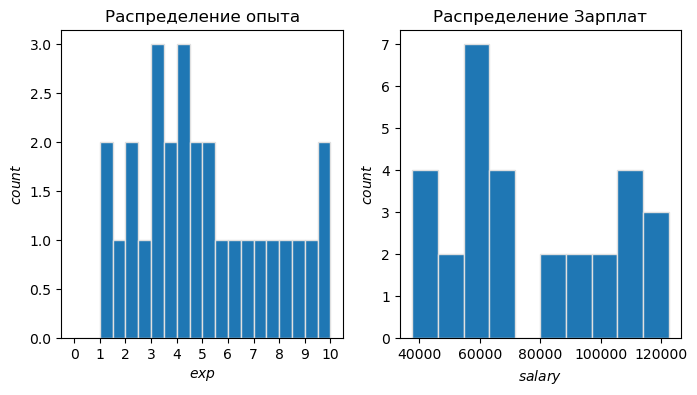

In [344]:
fig, (exp, salary) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

exp.hist(x=X_exp['YearsExperience'], edgecolor='#e0e0e0', bins=np.arange(0, X_exp['YearsExperience'].max(), 0.5))
exp.set_xticks(range(ceil(X_exp['YearsExperience'].max())))
exp.set_title('Распределение опыта')
exp.set_xlabel('$exp$')
exp.set_ylabel('$count$')

salary.hist(Y_salary, edgecolor='#e0e0e0')
salary.set_title('Распределение Зарплат')
salary.set_xlabel('$salary$')
salary.set_ylabel('$count$')


plt.show()

### ВЫВОД
Из гистограммы опыта видно, что людей с маленьким количество опыта больше. Исключение составляет кол-во опыта от 9.5 до 10 лет (что я посчитал бы выбросом, если бы разрыв был больше, и выборка была не в 30 человек))

## Номер 3. график зависимости

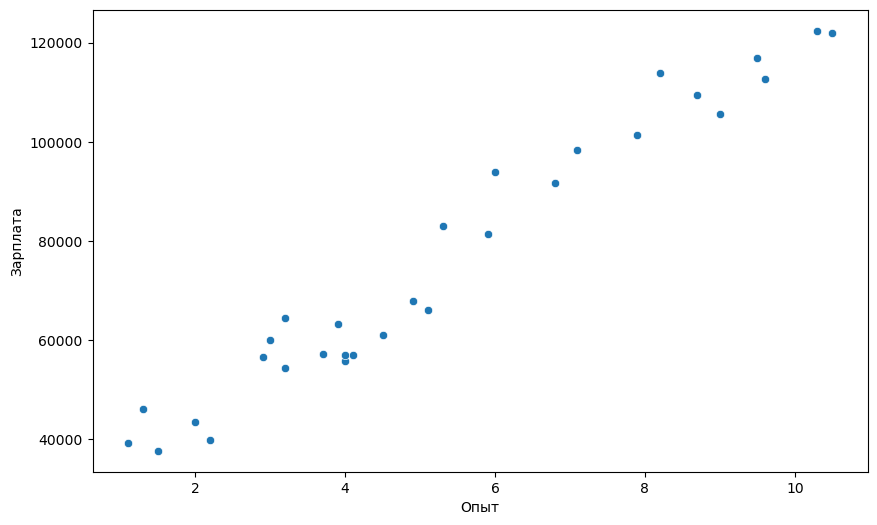

In [348]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_exp['YearsExperience'], y=Y_salary['Salary'])
plt.xlabel('Опыт')
plt.ylabel('Зарплата')
plt.show()

## График зависимости зарплаты от опыта
Из графика видно, что зависимость линейная

## Номер 4
Отмасштабируем данные при помощи MinMaScaler, чтобы масштаб данных не влиял на обучение модели 

In [350]:
scaler = MinMaxScaler()
scaler.fit(Y_salary)
prepared_salary_data = scaler.transform(Y_salary) 

In [352]:
prepared_salary_data

array([[0.01904087],
       [0.1000945 ],
       [0.        ],
       [0.06843846],
       [0.02551382],
       [0.22337586],
       [0.26481219],
       [0.19742499],
       [0.31554453],
       [0.229837  ],
       [0.30105126],
       [0.21335932],
       [0.22709662],
       [0.2285613 ],
       [0.27616348],
       [0.35680369],
       [0.33425467],
       [0.53575478],
       [0.51537916],
       [0.66393811],
       [0.63792818],
       [0.7151193 ],
       [0.75089771],
       [0.89866525],
       [0.84691708],
       [0.80145287],
       [0.93595559],
       [0.88476258],
       [1.        ],
       [0.9938696 ]])

## Номер 5
Разделим данные на обучающую и тестовую выборки

In [368]:
x_train, x_test, y_train, y_test = train_test_split(X_exp, prepared_salary_data, train_size=0.7)

In [370]:
reg = LinearRegression().fit(x_train, y_train)
y_predicted = reg.predict(x_test)
w_1 = reg.coef_ # 
w_0 = reg.intercept_  # свободный коеф

print(f"y_pred = {w_1[0][0]} * x + ({w_0[0]})")

y_pred = 0.11015470812676138 * x + (-0.126356525198972)


## померяем метрики модели

In [373]:
y_predicted

array([[0.09395289],
       [1.03026791],
       [0.2041076 ],
       [0.83198944],
       [0.6557419 ],
       [0.31426231],
       [0.36933966],
       [1.00823697],
       [0.11598383]])

In [375]:
y_test

array([[0.06843846],
       [0.9938696 ],
       [0.26481219],
       [0.84691708],
       [0.7151193 ],
       [0.22709662],
       [0.27616348],
       [1.        ],
       [0.02551382]])

In [377]:
model_err = mean_squared_error(y_test, y_predicted)
model_err # mse для решения модели

0.0037713010711577324

### Ошибка ~= 0, что говорит о том, что модель хорошо определяет зависимость

Сравним с аналитическим решением линейной регрессии. Вспомнил курс Яндекс Лицея :) 
Путем решения матричного уравнения, получим итоговое уравнение для для определения лучших коеф.
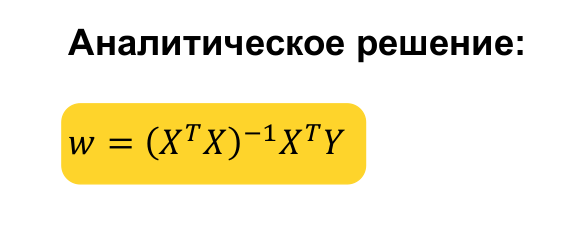

Аналитическое решение в общем случае вычислительно трудноемко. Но для такого датасета оно идеально подойдет

In [379]:
class AnalyticalSolution:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        
        n, k = X.shape
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((np.ones((n, 1)), X))

        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y) 

        return self

    def predict(self, X):
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((np.ones((n, 1)), X))

        y_pred = X_train @ self.w 

        return y_pred
    
    def get_weights(self):
        return self.w

In [381]:
analytical_sol = AnalyticalSolution()
analytical_sol.fit(x_train, y_train)
analytacal_predict = analytical_sol.predict(x_test)

In [383]:
analytical_err = mean_squared_error(y_test, analytacal_predict)
analytical_err # mse для аналитического решения

0.003771301071157749

In [385]:
abs(analytical_err - model_err)

1.6479873021779667e-17

## Вывод

Ошибка между аналитическим "идеальным" решением и решением модели пренебрежительно мало. Это означает, что модель отлично построила зависимость

## N6

In [387]:
def linear_func(w0, w1):
    return lambda x: w1 * x + w0

In [389]:
an_w0, an_w1 = analytical_sol.get_weights()

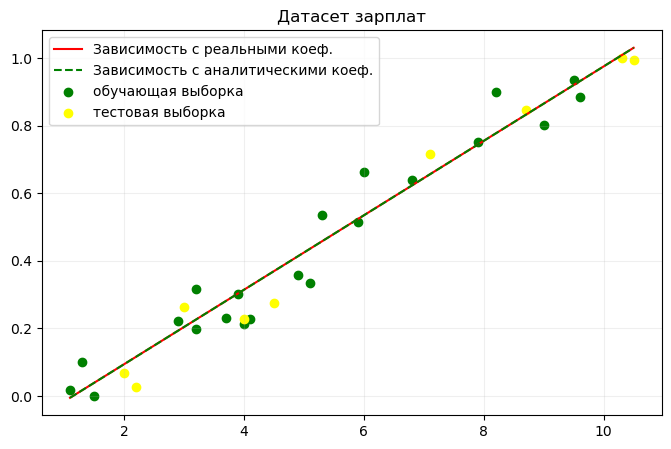

In [391]:
plt.figure(figsize=(8, 5))
plt.plot(X_exp, linear_func(w_0, w_1)(X_exp), label='Зависимость с реальными коеф.', c='red')
plt.plot(X_exp, linear_func(an_w0, an_w1)(X_exp), label='Зависимость с аналитическими коеф.', c='green', linestyle='--')
plt.scatter(x_train, y_train, label='обучающая выборка', c='g')
plt.scatter(x_test, y_test, label='тестовая выборка', c='yellow')

plt.title("Датасет зарплат")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

### На графике Изображен датасет (поделенный на тот, на котором модель обучалась и на тестовый). Также Изображен график линейной регрессии и график аналитического решения (изображен точками, чтобы оба решения было видно)

# Задание номер 2

## N1 - загрузка датасета

In [969]:
raw_data = pd.read_csv("Insurance.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [971]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## пропусков в датасете нет.

### N2 Анализ датасета

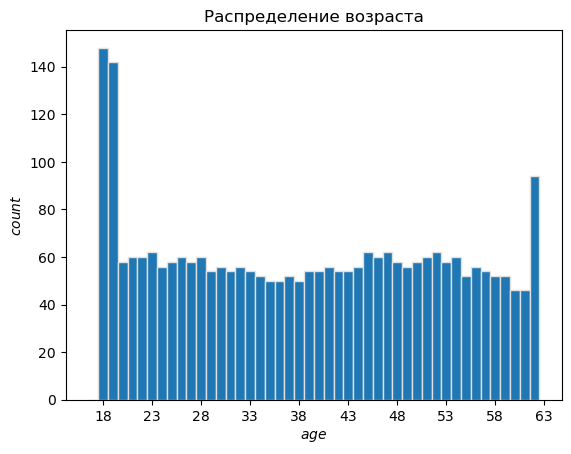

In [975]:
plt.hist(x=raw_data['age'], edgecolor='#e0e0e0', bins=np.arange(17, raw_data['age'].max()), align='left')
plt.xticks(range(18, ceil(raw_data['age'].max()), 5))
plt.title('Распределение возраста')
plt.xlabel('$age$')
plt.ylabel('$count$')

plt.show()

Количество мужчин и женщин

In [978]:
# для того, чтобы отображать кол-во и процент на графике
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

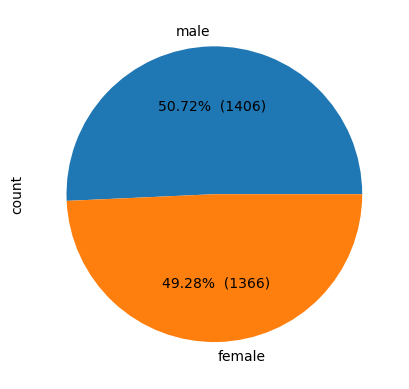

In [980]:
raw_data['sex'].value_counts().plot(kind='pie', autopct=make_autopct(raw_data['sex'].value_counts())),
plt.show()

In [982]:
raw_data['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

### Определили кол-во женщин и мужчин и их процентное соотношение

In [985]:
raw_data['bmi'].mean()  # средний индекс массы тела

30.70134920634921

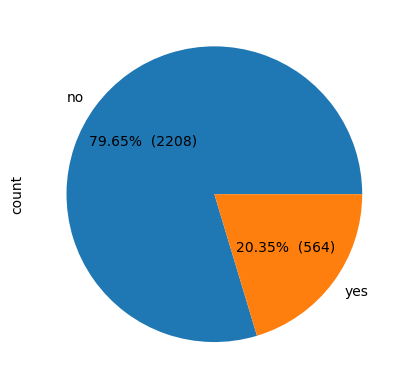

In [987]:
raw_data['smoker'].value_counts().plot(kind='pie', autopct=make_autopct(raw_data['sex'].value_counts())),
plt.show()

Некурящих людей в 4 раза меньше

In [990]:
print(raw_data[raw_data['children'] > 0].head())
print("Всего людей с детьми:", len(raw_data[raw_data['children'] > 0]))


   age     sex    bmi  children smoker     region    charges
1   18    male  33.77         1     no  southeast  1725.5523
2   28    male  33.00         3     no  southeast  4449.4620
6   46  female  33.44         1     no  southeast  8240.5896
7   37  female  27.74         3     no  northwest  7281.5056
8   37    male  29.83         2     no  northeast  6406.4107
Всего людей с детьми: 1586


Всего людей, у которых есть дети - 1586

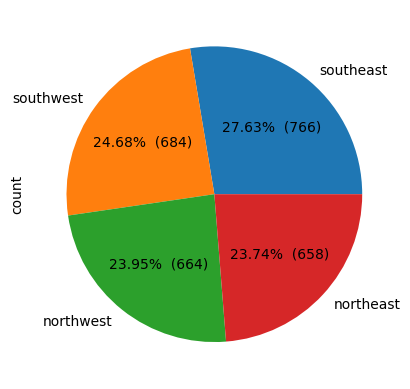

In [993]:
raw_data['region'].value_counts().plot(kind='pie', autopct=make_autopct(raw_data['sex'].value_counts())),
plt.show()

Видно, что примерно в каждом регионе одинаковое кол-во людей. Хотя больше всего людей с southeast - 27.63%, меньше всего - с northeast - 23.74%

### Вывод

Датасет является сбалансированным ( кроме колонки курящих/не курящих людей)

Перевед категориальные признаки в вещественные с помощью класса OneHotEncoder

## N3

In [999]:
raw_data.iloc[raw_data['charges'].idxmax()]

age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object

In [1001]:
raw_data.iloc[raw_data['charges'].idxmin()]

age                18
sex              male
bmi             23.21
children            0
smoker             no
region      southeast
charges     1121.8739
Name: 940, dtype: object

## N4

In [1004]:
ohe = OneHotEncoder()
# raw_data
raw_cat = raw_data[['sex', 'smoker', 'region']]
raw_numeric = raw_data[['age', 'bmi', 'children' 'charges']]
# raw_numeric
processed_cat = ohe.fit(raw_cat)
processed_cat = pd.DataFrame(processed_cat.transform(raw_cat).toarray(), columns=processed_cat.get_feature_names_out())
processed_data = pd.concat([processed_cat, raw_numeric], axis=1)
processed_data.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,3866.85520


In [1006]:
X_train, X_test, y_train, y_test = train_test_split(processed_data.loc[:, processed_data.columns != 'charges'], processed_data[['charges']], train_size=0.7)

In [1008]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [1010]:
predicted_y = lin_reg_model.predict(X_test)

In [1012]:
mean_squared_error(y_test, predicted_y)

35990464.210666925

Попытаемся улучшить результат. Посмотрим на зависимость таргета от разлчных фичей и очистим датасет

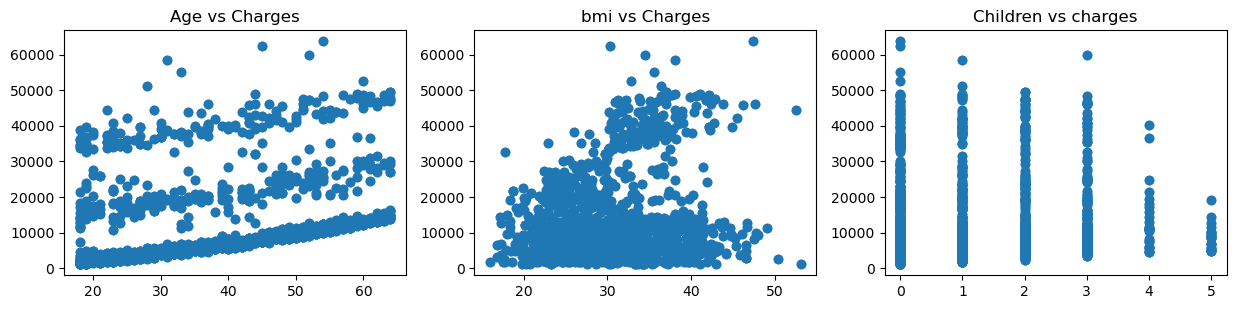

In [1015]:
# соотношение таргета и разных числовых фичей
plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.scatter(raw_data["age"], raw_data['charges'])
plt.title("Age vs Charges")

plt.subplot(232)
plt.scatter(raw_data["bmi"], raw_data['charges'])
plt.title("bmi vs Charges")

plt.subplot(233)
plt.scatter(raw_data["children"], raw_data["charges"])
plt.title("Children vs charges")

plt.show()

Чистим датасет

In [1018]:
processed_data = processed_data.drop(processed_data[processed_data["bmi"] > 50].index.to_list())

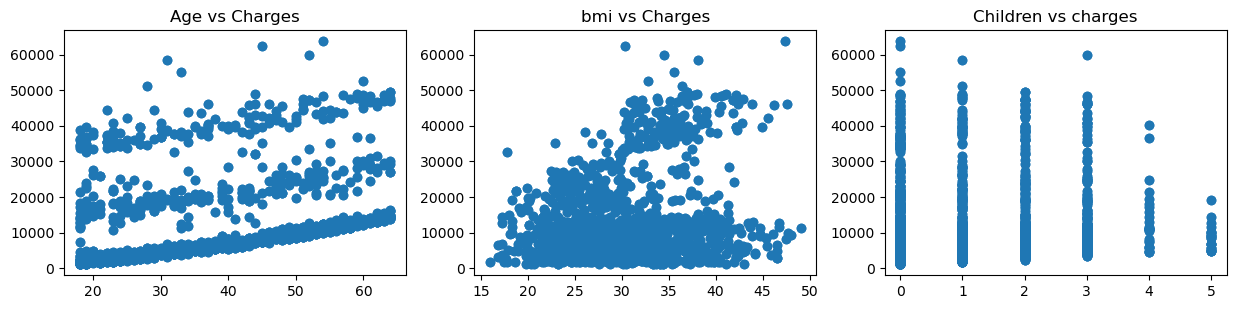

In [1020]:
plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.scatter(raw_data["age"], raw_data['charges'])
plt.title("Age vs Charges")

plt.subplot(232)
plt.scatter(processed_data["bmi"], processed_data['charges'])
plt.title("bmi vs Charges")

plt.subplot(233)
plt.scatter(raw_data["children"], raw_data["charges"])
plt.title("Children vs charges")

plt.show()

<Axes: xlabel='age', ylabel='charges'>

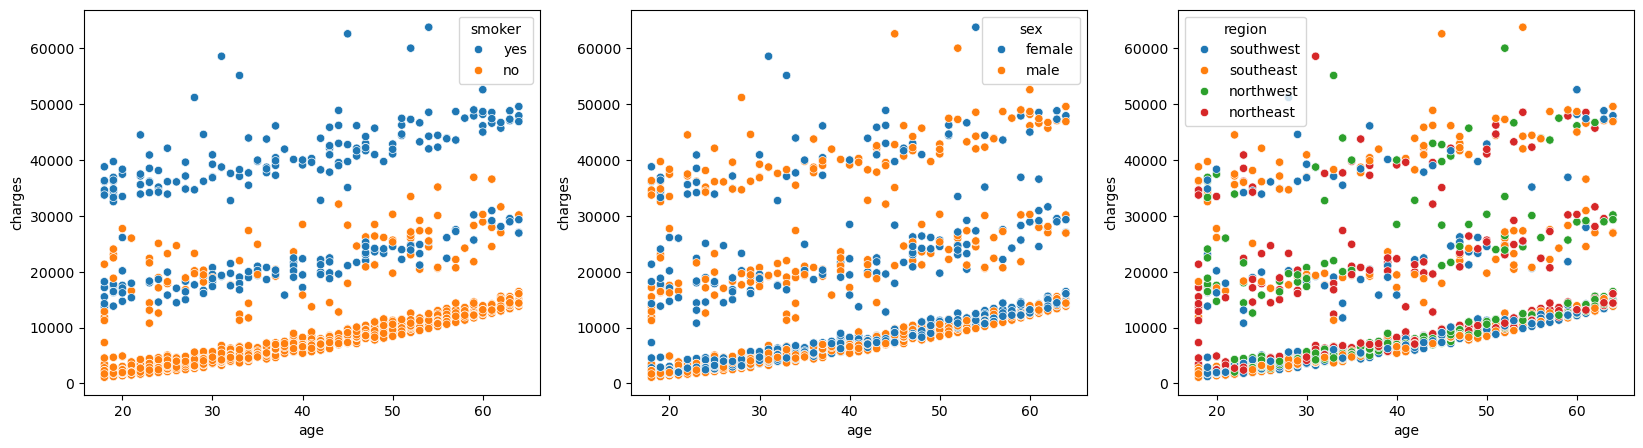

In [1022]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
sns.scatterplot(ax=axes[0], x=raw_data['age'], y=raw_data['charges'], hue=raw_data['smoker'])
sns.scatterplot(ax=axes[1], x=raw_data['age'], y=raw_data['charges'], hue=raw_data['sex'])
sns.scatterplot(ax=axes[2], x=raw_data['age'], y=raw_data['charges'], hue=raw_data['region'])

По графикам видно, что из категориальных признаков влияние оказывает только smoker. Те, кто курят платят больше.
Остальные признаки можно игнорировать. Признка smoker не сбалансирован, это надо учитывать

In [1024]:
# raw_data = raw_data.drop(columns=['sex', 'region'])  # оч плохо для дебаггинга

In [1071]:
ohe = OneHotEncoder().fit(raw_data[['smoker']])
raw_numeric = raw_data[['age', 'bmi', 'charges']]
raw_cat = raw_data[['smoker']]
# raw_numeric
processed_cat = pd.DataFrame(ohe.transform(raw_cat).toarray(), columns=ohe.get_feature_names_out())
processed_data = pd.concat([processed_cat, raw_numeric], axis=1)
processed_data.head()

,smoker_no,smoker_yes,age,bmi,charges
0,0.0,1.0,19,27.900,16884.92400
1,1.0,0.0,18,33.770,1725.55230
2,1.0,0.0,28,33.000,4449.46200
3,1.0,0.0,33,22.705,21984.47061
4,1.0,0.0,32,28.880,3866.85520


In [1073]:
X_train, X_test, y_train, y_test = train_test_split(processed_data.loc[:, processed_data.columns != 'charges'], processed_data[['charges']], train_size=0.7, stratify=processed_data[['smoker_no']])

In [1095]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# без повторного обучения применяем то же мастабирование данных
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.50563171, -0.50563171,  1.71105908,  1.7660829 ],
       [ 0.50563171, -0.50563171,  0.7855672 , -0.86868724],
       [-1.97772405,  1.97772405, -0.85184152, -0.95911616],
       ...,
       [ 0.50563171, -0.50563171, -1.42137498, -0.88923927],
       [-1.97772405,  1.97772405, -1.3501833 , -1.44414405],
       [ 0.50563171, -0.50563171, -1.49256666, -0.34255529]])

In [1093]:
X_train[['smoker_no']].count() / X_train[['smoker_no']].sum()

smoker_no    1.255663
dtype: float64

In [1077]:
X_test_scaled[['smoker_no']].count() / X_test_scaled[['smoker_no']].sum()

smoker_no    1.254902
dtype: float64

In [1097]:
lr_model = LinearRegression().fit(X_train_scaled, y_train)

In [1099]:
y_predicted = lr_model.predict(X_test_scaled)

In [1101]:
mean_squared_error(y_predicted, y_test)

35994776.94805138